In [21]:
import pandas 
import seaborn
import matplotlib.pyplot as plt 

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipotle_data = pandas.read_csv(url, sep = '\t')
chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipotle_data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [29]:
chipotle_data['item-price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\aakka\AppData\Local\Temp\ipykernel_13964\479640831.py:1: SyntaxWarning: invalid escape sequence '\$'
  chipotle_data['item-price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)


In [5]:
chipotle_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [15]:
salsa = chipotle_data.groupby('item_name')['quantity'].sum()
max_item = salsa.idxmax()
max_score = salsa.max()

print("Max item:", max_item)
print("Max score:", max_score)

Max item: Chicken Bowl
Max score: 761


In [18]:
#total revenue
chipotle_data['revenue'] = chipotle_data['quantity'] * chipotle_data['item_price'].str.replace('$', '').astype(float)
total_revenue = chipotle_data['revenue'].sum()

print("Total revenue:", total_revenue)

Total revenue: 39237.02


In [22]:
#total number of orders
total_orders = chipotle_data['order_id'].nunique()

print("Total number of orders:", total_orders)

Total number of orders: 1834


In [24]:
#how many items cost more than $10
expensive_items = chipotle_data[chipotle_data['item_price'].str.replace('$', '').astype(float) > 10]
num_expensive_items = expensive_items['item_name'].nunique()
print("Number of items that cost more than $10:", num_expensive_items)

Number of items that cost more than $10: 31


In [26]:
#list of all the unique items in the dataset
unique_items = chipotle_data['item_name'].unique()
print("Unique items in the dataset:", unique_items)

Unique items in the dataset: ['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Sal

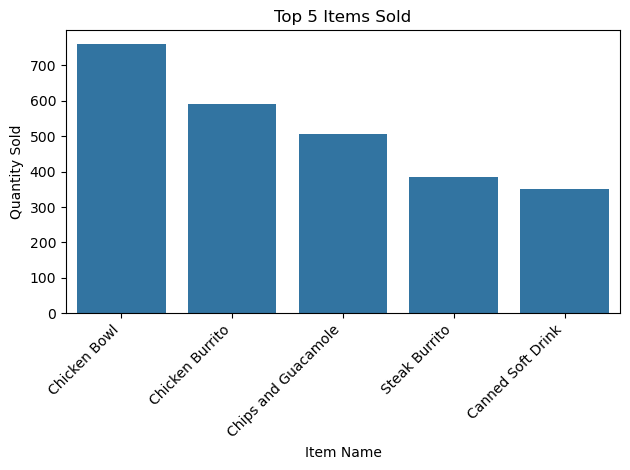

In [33]:
#Bar Graph of top 5 items sold

max_prices = chipotle_data.groupby('item_name')['quantity'].sum().nlargest(5)

seaborn.barplot(x=max_prices.index, y=max_prices.values)
plt.title('Top 5 Items Sold')
plt.xlabel('Item Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha ='right')
plt.tight_layout()
plt.show()



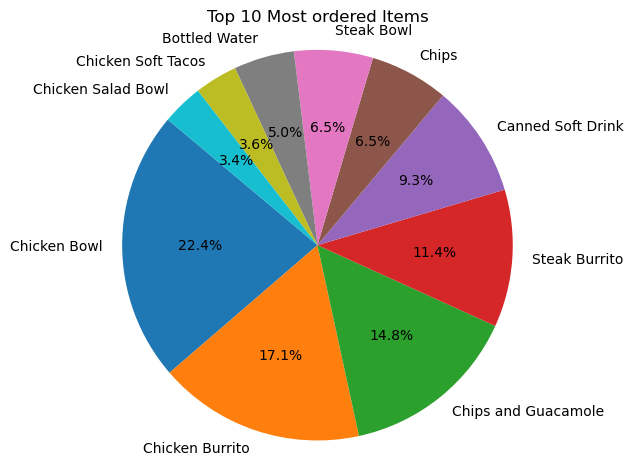

In [35]:
most_sold = chipotle_data.groupby('item_name')['order_id'].count().nlargest(10)

plt.pie(most_sold, labels=most_sold.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most ordered Items')
plt.tight_layout()
plt.show()